In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np


# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')



CUDA is available!  Training on GPU ...


In [8]:
transform  = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train = torchvision.datasets.ImageFolder("../input/dataset/English/English/Train",transform=transform)

test = torchvision.datasets.ImageFolder("../input/dataset/English/English/Test",transform=transform)


num_train = len(train)

indices = list(range(num_train))

np.random.shuffle(indices)

split = int(np.floor(0.2*num_train))

train_idx,val_idx = indices[split:],indices[:split]

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_idx)

train_loader = torch.utils.data.DataLoader(train, batch_size=20,
    sampler=train_sampler, num_workers=0)
valid_loader = torch.utils.data.DataLoader(train, batch_size=20, 
    sampler=val_sampler, num_workers=0)
test_loader = torch.utils.data.DataLoader(test, batch_size=20, 
    num_workers=0,shuffle = True)


classes = ['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005',
           'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010',
          'Sample011','Sample012','Sample013','Sample014','Sample015','Sample016',
          'Sample017','Sample018','Sample019','Sample020','Sample021','Sample022','Sample023',
          'Sample024','Sample025','Sample026','Sample027','Sample028','Sample029','Sample030',
          'Sample031','Sample032','Sample033','Sample034','Sample035','Sample036','Sample037','Sample038',
          'Sample039','Sample040','Sample041','Sample042','Sample043','Sample044','Sample045','Sample046',
          'Sample047','Sample048','Sample049','Sample050','Sample051','Sample052','Sample053','Sample054','Sample055','Sample056',
          'Sample057','Sample058','Sample059','Sample060','Sample061','Sample062']

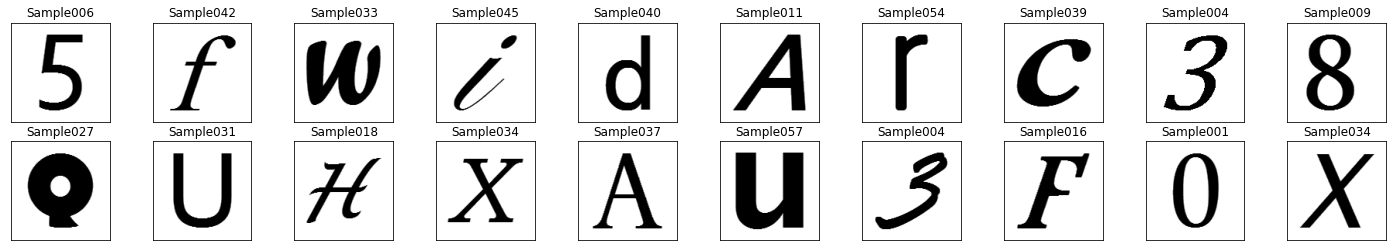

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [10]:
class CNN(nn.Module):
    

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

        
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

           
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(65536, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, len(classes))
        )


    def forward(self, x):
    
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)

        return x

In [11]:
model = CNN()
if train_on_gpu:
    model.cuda()


criterion = nn.CrossEntropyLoss()
optimiser  = torch.optim.SGD(model.parameters(), lr=0.004)

In [12]:



num_epochs = 10
trainlosses  = []
vallosses = []

for i in range(num_epochs):
  train_loss=0
  val_loss=0
  model.train()
  for image,label in train_loader:
    if train_on_gpu:
      image,label = image.cuda(),label.cuda()
    optimiser.zero_grad()
    output = model(image)
    loss = criterion(output,label)
    loss.backward()
    optimiser.step()
    train_loss += loss.item()*image.size(0)
  
  model.eval()
  for image, label in valid_loader:
        if train_on_gpu:
            image, label = image.cuda(), label.cuda()
        output = model(image)
        loss = criterion(output, label)
        val_loss += loss.item()*image.size(0)
  
  train_loss = train_loss/len(train_loader.sampler)
  trainlosses.append(train_loss)
  val_loss = val_loss/len(valid_loader.sampler)
  vallosses.append(val_loss)        
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        i+1, train_loss, val_loss))
  
    


Epoch: 1 	Training Loss: 1.193067 	Validation Loss: 0.675935
Epoch: 2 	Training Loss: 0.541051 	Validation Loss: 0.482724
Epoch: 3 	Training Loss: 0.415209 	Validation Loss: 0.424822
Epoch: 4 	Training Loss: 0.339650 	Validation Loss: 0.353553
Epoch: 5 	Training Loss: 0.292355 	Validation Loss: 0.353486
Epoch: 6 	Training Loss: 0.255237 	Validation Loss: 0.308652
Epoch: 7 	Training Loss: 0.231562 	Validation Loss: 0.312121
Epoch: 8 	Training Loss: 0.214509 	Validation Loss: 0.286059
Epoch: 9 	Training Loss: 0.198428 	Validation Loss: 0.300522
Epoch: 10 	Training Loss: 0.186535 	Validation Loss: 0.259348


In [14]:



test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # updating test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # comparing predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculating test accuracy for each object class
    for i in range(len(target.data)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# Test loss average
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.213454

Test Accuracy of Sample001: 91% (85/93)
Test Accuracy of Sample002: 86% (80/93)
Test Accuracy of Sample003: 98% (92/93)
Test Accuracy of Sample004: 98% (92/93)
Test Accuracy of Sample005: 100% (93/93)
Test Accuracy of Sample006: 98% (92/93)
Test Accuracy of Sample007: 98% (92/93)
Test Accuracy of Sample008: 100% (93/93)
Test Accuracy of Sample009: 97% (91/93)
Test Accuracy of Sample010: 100% (93/93)
Test Accuracy of Sample011: 98% (92/93)
Test Accuracy of Sample012: 98% (92/93)
Test Accuracy of Sample013: 86% (80/93)
Test Accuracy of Sample014: 98% (92/93)
Test Accuracy of Sample015: 98% (92/93)
Test Accuracy of Sample016: 100% (93/93)
Test Accuracy of Sample017: 98% (92/93)
Test Accuracy of Sample018: 96% (90/93)
Test Accuracy of Sample019: 87% (81/93)
Test Accuracy of Sample020: 100% (93/93)
Test Accuracy of Sample021: 98% (92/93)
Test Accuracy of Sample022: 98% (92/93)
Test Accuracy of Sample023: 96% (90/93)
Test Accuracy of Sample024: 100% (93/93)
Test Accuracy

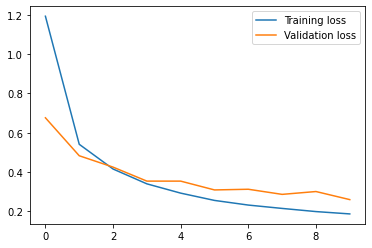

In [19]:
plt.plot(trainlosses,label="training loss")
plt.plot(vallosses,label="validation loss")
plt.legend(["Training loss", "Validation loss"])

Predicted:  Sample036 Sample005 Sample012 Sample045 Sample058 Sample037 Sample058 Sample014 Sample041 Sample038 Sample011 Sample017 Sample018 Sample043 Sample017 Sample014 Sample046 Sample042 Sample040 Sample042


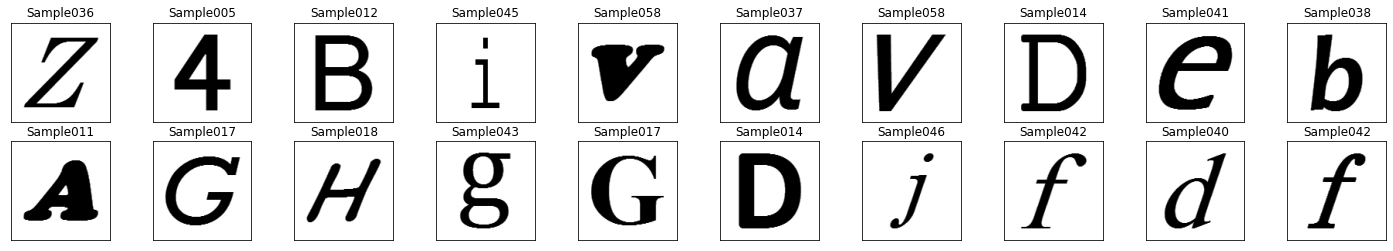

In [16]:
test_iterator = iter(test_loader)
images, labels = test_iterator.next()
images = images.cuda()
results = model(images)
images = images.cpu()
_, predicted = torch.max(results, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(20)))

fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])